  
# Sentiment Analysis

In [ ]:
!pip install torch
!pip install transformers
!pip3 install torch
!run pip install --user -U nltk

/bin/bash: line 1: run: command not found


In [ ]:
from finbert import predict
import nltk
from transformers import AutoModelForSequenceClassification
nltk.download('punkt')
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('ProsusAI/finbert',num_labels=3,cache_dir=None)

In [ ]:
text="""Shares of auto major Tata Motors jumped over 4 percent to their record high on Friday after the company's arm Jaguar Land Rover (JLR) India reported its highest-ever performance in the first half of financial year 2023-24 (FY24). The company posted an over 97 percent year-on-year (YoY) jump in its total sales for April-September at 2,356 units from around 1,194 units in the same period last year. The stock rose as much as 4.4 percent to its all-time high of ₹665.50. It has advanced over 77 percent from its 52-week low of ₹375.50, hit on December 26, 2022.

The auto major has surged over 60 percent in the last 1 year and over 71 percent in 2023 YTD, giving positive returns in 8 of the 10 months so far. It has added 5.5 percent in October so far.In comparison, the Nifty Auto index added around 30 percent in the last 1 year as well as in 2023 YTD.

This growth in the first half of FY24 was driven by record sales in both quarters. Meanwhile, the September quarter (Q2FY24) also witnessed a massive 108 percent growth YoY at 1,308 units. It had previously reported a 102 percent sales growth in Q1 on a yearly basis.

"The consistent growth in our order book exemplifies the growing strength of our brand and products in the hearts of Indian consumers. The company would continue to introduce new products that are best suited to meet the discerning needs of customers and invest in strengthening brand desire and client experience," said JLR India Managing Director Rajan Amba."""

In [ ]:
predict(text,model)

,sentence,logit,prediction,sentiment_score
0,Shares of auto major Tata Motors jumped over 4...,"[0.93754137, 0.031876218, 0.03058244]",positive,0.905665
1,The company posted an over 97 percent year-on-...,"[0.9475511, 0.03018109, 0.022267854]",positive,0.917370
2,The stock rose as much as 4.4 percent to its a...,"[0.93479604, 0.020259622, 0.044944447]",positive,0.914536
3,It has advanced over 77 percent from its 52-we...,"[0.94763094, 0.02564025, 0.02672889]",positive,0.921991
4,The auto major has surged over 60 percent in t...,"[0.9519143, 0.021647604, 0.026438119]",positive,0.930267
5,It has added 5.5 percent in October so far.In ...,"[0.8905778, 0.017328037, 0.09209417]",positive,0.873250
6,This growth in the first half of FY24 was driv...,"[0.95613736, 0.020092366, 0.023770295]",positive,0.936045
7,"Meanwhile, the September quarter (Q2FY24) also...","[0.9516192, 0.018569987, 0.029810792]",positive,0.933049
8,It had previously reported a 102 percent sales...,"[0.9279709, 0.012540599, 0.05948851]",positive,0.915430
9,"""The consistent growth in our order book exemp...","[0.9446649, 0.014618199, 0.04071701]",positive,0.930047


In [ ]:
class Sentimental:
  def __init__(self, text, aver=0):
    self.text = text
    self.aver = aver

  def avgSentiment(self):
    model=AutoModelForSequenceClassification.from_pretrained('ProsusAI/finbert',num_labels=3,cache_dir=None)
    df=predict(text,model)

    polarNP = np.array(df["sentiment_score"].tolist())
    aver = np.sum(polarNP)/len(df)
    self.aver = aver
    return


test = Sentimental(text)
res = test.avgSentiment()
test.aver

0.9154997413808649

# Web Scraper

In [ ]:
!pip install goose3

In [ ]:
from goose3 import Goose

In [ ]:
from goose3 import Goose
url = "https://www.moneycontrol.com/news/business/tcs-wipro-infosys-added-record-1-7-lakh-employees-in-2021-7930061.html"
g = Goose()
article = g.extract(url=url)
article.title
article.cleaned_text

'Three IT companies -- TCS, Infosys and Wipro -- added a record 1.7 lakh employees for 2021, a multi-fold increase from the 31,000 they had hired in 2020. This jump in hiring comes on the back of acceleration in digital technologies and rising attrition.\n\nWith demand for technology services continuing to outstrip supply, the IT companies also stepped up their fresher hiring to meet the growing demand.\n\nFor the first three quarters of FY22, the three companies hired 1.34 lakh employees, compared with 35,000 between April and December 2020.\n\nThe three IT firms stepped up their fresher hiring numbers in FY22. At 17,500, Wipro’s fresher hiring is 70 percent more than what the company hired in FY21. Infosys will hire 55,000 freshers in FY22, and TCS has on-boarded a record 78,000 campus recruits so far.\n\nThis momentum is likely to continue in the next year as well.\n\nWhen the pandemic hit, it resulted in increased consumption of technology services as consumers adapted to online se

# SERP(search engine result page)

In [ ]:
!pip install google-search-results

In [ ]:


'''
search = GoogleSearch({
    "q": '"infosys" site:www.moneycontrol.com inurl:2021 filetype:html"',
    "location": "",
    "api_key": "dba413672959ab722530ae3b1fddf9aeeb2e791b1e2eb9bea64aa4c901d77e0f"
  })

result = search.get_dict()
print(result)
#print(result.keys())
#"infosys" site:www.moneycontrol.com inurl:2021 filetype:html
'''

'\nsearch = GoogleSearch({\n    "q": \'"infosys" site:www.moneycontrol.com inurl:2021 filetype:html"\',\n    "location": "",\n    "api_key": "dba413672959ab722530ae3b1fddf9aeeb2e791b1e2eb9bea64aa4c901d77e0f"\n  })\n\nresult = search.get_dict()\nprint(result)\n#print(result.keys())\n#"infosys" site:www.moneycontrol.com inurl:2021 filetype:html\n'

# Genral Sentiment(Integrated)

In [ ]:
from goose3 import Goose
from serpapi import GoogleSearch

import pandas as pd
company = input("Enter the company: ")
site = "www.moneycontrol.com"

g = Goose()
data = pd.DataFrame()

y = []

year = 2021
func=True
for year in range (2021,2024):
  text = []
  def link_generator(company):
    search = GoogleSearch({
    "q": f'"{company}" site:{site} inurl:{year} filetype:html',
    "location": "",
    "api_key": "dba413672959ab722530ae3b1fddf9aeeb2e791b1e2eb9bea64aa4c901d77e0f"
      })

    result = search.get_dict()
    print(result)
    d = result['organic_results']

    link_list = []

    for i in d:
      l = i['link']
      if l[-1] == 'l':
        link_list.append(l)

    return link_list

  l = link_generator(company)
  for i in range(len(l)):
    print(f"{i+1}:{l[i]}")
  year=year+1

  print()


  for url in l:
    article = g.extract(url = url)
    #print(article.cleaned_text)
    text.append(article.cleaned_text)


  for t in text:
    p = predict(t,model)
    #print(p)
    data = data.append(p, ignore_index=True)

  y.append(len(data))

  display(data)




'''
for i in range(3):
  search = GoogleSearch({
    "q": f"{company} site:{site} inurl:{year} filetype:html",
    "location": "",
    "api_key": "dba413672959ab722530ae3b1fddf9aeeb2e791b1e2eb9bea64aa4c901d77e0f"
  })

  result = search.get_dict()

  year = year+1
'''





Enter the company: ibm
{'search_metadata': {'id': '652b41efa5ad6d540b5984dd', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/d7dfbd0b5129ecfe/652b41efa5ad6d540b5984dd.json', 'created_at': '2023-10-15 01:35:43 UTC', 'processed_at': '2023-10-15 01:35:43 UTC', 'google_url': 'https://www.google.com/search?q=%22ibm%22+site%3Awww.moneycontrol.com+inurl%3A2021+filetype%3Ahtml&oq=%22ibm%22+site%3Awww.moneycontrol.com+inurl%3A2021+filetype%3Ahtml&sourceid=chrome&ie=UTF-8', 'raw_html_file': 'https://serpapi.com/searches/d7dfbd0b5129ecfe/652b41efa5ad6d540b5984dd.html', 'total_time_taken': 1.16}, 'search_parameters': {'engine': 'google', 'q': '"ibm" site:www.moneycontrol.com inurl:2021 filetype:html', 'google_domain': 'google.com', 'device': 'desktop'}, 'search_information': {'query_displayed': '"ibm" site:www.moneycontrol.com inurl:2021 filetype:html', 'total_results': 6, 'time_taken_displayed': 0.19, 'menu_items': [{'position': 1, 'title': 'Images', 'link': 'https://www.goog

<ipython-input-106-3553e45d7cb0>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-106-3553e45d7cb0>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-106-3553e45d7cb0>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-106-3553e45d7cb0>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-106-3553e45d7cb0>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

,sentence,logit,prediction,sentiment_score
0,Rank 10 | Multinational conglomerate company S...,"[0.66881615, 0.015213738, 0.3159701]",positive,0.653602
1,Rank 9 | The information technology company Wi...,"[0.6436812, 0.018102074, 0.33821663]",positive,0.625579
2,Rank 8 | Tata Consultancy Services is India’s ...,"[0.8437308, 0.010662726, 0.14560638]",positive,0.833068
3,Rank 7 | The International Business Machines (...,"[0.072713785, 0.05460846, 0.87267774]",neutral,0.018105
4,(Image: Reuters)\n\nRank 6 | Dell Technologies...,"[0.9454582, 0.016399316, 0.038142566]",positive,0.929059
...,...,...,...,...
133,"Now, they are business partners and neighbours...","[0.08925866, 0.02156029, 0.8891811]",neutral,0.067698
134,"Between movies and books, the two friends drum...","[0.1040682, 0.03069274, 0.8652391]",neutral,0.073375
135,The e-bikes that remind one of yellow daffodil...,"[0.03443787, 0.065347545, 0.90021455]",neutral,-0.030910
136,Where to buy: store.blive.co.in; BLive ships e...,"[0.094932474, 0.009683177, 0.8953844]",neutral,0.085249


{'search_metadata': {'id': '652b421c1baebb7ba8dd2811', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/59769bed627a3cc3/652b421c1baebb7ba8dd2811.json', 'created_at': '2023-10-15 01:36:28 UTC', 'processed_at': '2023-10-15 01:36:28 UTC', 'google_url': 'https://www.google.com/search?q=%22ibm%22+site%3Awww.moneycontrol.com+inurl%3A2022+filetype%3Ahtml&oq=%22ibm%22+site%3Awww.moneycontrol.com+inurl%3A2022+filetype%3Ahtml&sourceid=chrome&ie=UTF-8', 'raw_html_file': 'https://serpapi.com/searches/59769bed627a3cc3/652b421c1baebb7ba8dd2811.html', 'total_time_taken': 1.96}, 'search_parameters': {'engine': 'google', 'q': '"ibm" site:www.moneycontrol.com inurl:2022 filetype:html', 'google_domain': 'google.com', 'device': 'desktop'}, 'search_information': {'query_displayed': '"ibm" site:www.moneycontrol.com inurl:2022 filetype:html', 'total_results': 8, 'time_taken_displayed': 0.36, 'menu_items': [{'position': 1, 'title': 'Images', 'link': 'https://www.google.com/search?sca_esv=5

<ipython-input-106-3553e45d7cb0>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-106-3553e45d7cb0>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-106-3553e45d7cb0>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-106-3553e45d7cb0>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-106-3553e45d7cb0>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

,sentence,logit,prediction,sentiment_score
0,Rank 10 | Multinational conglomerate company S...,"[0.66881615, 0.015213738, 0.3159701]",positive,0.653602
1,Rank 9 | The information technology company Wi...,"[0.6436812, 0.018102074, 0.33821663]",positive,0.625579
2,Rank 8 | Tata Consultancy Services is India’s ...,"[0.8437308, 0.010662726, 0.14560638]",positive,0.833068
3,Rank 7 | The International Business Machines (...,"[0.072713785, 0.05460846, 0.87267774]",neutral,0.018105
4,(Image: Reuters)\n\nRank 6 | Dell Technologies...,"[0.9454582, 0.016399316, 0.038142566]",positive,0.929059
...,...,...,...,...
338,"In India, Coursers works with Manipal Institut...","[0.07117424, 0.011508355, 0.9173174]",neutral,0.059666
339,Goli said that the platform is currently worki...,"[0.7874794, 0.0071160477, 0.20540446]",positive,0.780363
340,This initiative was started in October 2019.,"[0.086042896, 0.009643503, 0.90431356]",neutral,0.076399
341,A minimum of 30-32 percent annual growth is wh...,"[0.46639404, 0.009569403, 0.5240366]",neutral,0.456825


{'search_metadata': {'id': '652b5a4daef26490087df47d', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/09946b27cebce741/652b5a4daef26490087df47d.json', 'created_at': '2023-10-15 03:19:41 UTC', 'processed_at': '2023-10-15 03:19:41 UTC', 'google_url': 'https://www.google.com/search?q=%22ibm%22+site%3Awww.moneycontrol.com+inurl%3A2023+filetype%3Ahtml&oq=%22ibm%22+site%3Awww.moneycontrol.com+inurl%3A2023+filetype%3Ahtml&sourceid=chrome&ie=UTF-8', 'raw_html_file': 'https://serpapi.com/searches/09946b27cebce741/652b5a4daef26490087df47d.html', 'total_time_taken': 5.6}, 'search_parameters': {'engine': 'google', 'q': '"ibm" site:www.moneycontrol.com inurl:2023 filetype:html', 'google_domain': 'google.com', 'device': 'desktop'}, 'search_information': {'query_displayed': '"ibm" site:www.moneycontrol.com inurl:2023 filetype:html', 'total_results': 58, 'time_taken_displayed': 0.34, 'menu_items': [{'position': 1, 'title': 'News', 'link': 'https://www.google.com/search?sca_esv=573

<ipython-input-106-3553e45d7cb0>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-106-3553e45d7cb0>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-106-3553e45d7cb0>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-106-3553e45d7cb0>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-106-3553e45d7cb0>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

,sentence,logit,prediction,sentiment_score
0,Rank 10 | Multinational conglomerate company S...,"[0.66881615, 0.015213738, 0.3159701]",positive,0.653602
1,Rank 9 | The information technology company Wi...,"[0.6436812, 0.018102074, 0.33821663]",positive,0.625579
2,Rank 8 | Tata Consultancy Services is India’s ...,"[0.8437308, 0.010662726, 0.14560638]",positive,0.833068
3,Rank 7 | The International Business Machines (...,"[0.072713785, 0.05460846, 0.87267774]",neutral,0.018105
4,(Image: Reuters)\n\nRank 6 | Dell Technologies...,"[0.9454582, 0.016399316, 0.038142566]",positive,0.929059
...,...,...,...,...
574,"Each plays a unique role, with specific action...","[0.10903794, 0.82828695, 0.06267512]",negative,-0.719249
575,"In fact, large SaaS firms have undertaken layo...","[0.00883261, 0.97013444, 0.021033028]",negative,-0.961302
576,SaaS major Freshworks undertook at least three...,"[0.008565601, 0.9706829, 0.020751419]",negative,-0.962117
577,“There is definitely a bit of slowdown as the ...,"[0.057546023, 0.9091391, 0.033314876]",negative,-0.851593


'\nfor i in range(3):\n  search = GoogleSearch({\n    "q": f"{company} site:{site} inurl:{year} filetype:html",\n    "location": "",\n    "api_key": "dba413672959ab722530ae3b1fddf9aeeb2e791b1e2eb9bea64aa4c901d77e0f"\n  })\n\n  result = search.get_dict()\n\n  year = year+1\n'

In [ ]:
print(y)
alpha = 0.125
u_0 = np.sum(data['sentiment_score'])/len(data)
n = len(data)

u_values = [u_0]

for i in range(1, n):
    r_n = data.loc[i, 'sentiment_score']
    u_n = (1 - alpha) * u_values[i - 1] + alpha * r_n
    u_values.append(u_n)


for i, u in enumerate(u_values):
    print(f'u_{i} = {u}')


threshold = sum(u_values)/len(u_values)




[138, 343, 579]
u_0 = 0.18920015588737316
u_1 = 0.2437475336931118
u_2 = 0.3174126010809563
u_3 = 0.2799991914905553
u_4 = 0.36113164878068016
u_5 = 0.4238468835667316
u_6 = 0.420495778439055
u_7 = 0.48073665435404467
u_8 = 0.4904712201990637
u_9 = 0.5452456043768137
u_10 = 0.47571173897022334
u_11 = 0.5038228943129881
u_12 = 0.5409941573846282
u_13 = 0.5715652542729625
u_14 = 0.554595769220791
u_15 = 0.5821033201390768
u_16 = 0.3941136222633205
u_17 = 0.36543645214124737
u_18 = 0.4316513914088278
u_19 = 0.40709535526160257
u_20 = 0.36170556362527984
u_21 = 0.4155777512893188
u_22 = 0.3747357475550939
u_23 = 0.3331387205613626
u_24 = 0.2861406777780604
u_25 = 0.24652033636184362
u_26 = 0.20698593851735542
u_27 = 0.18677337958498852
u_28 = 0.1772159110861376
u_29 = 0.1546445970051175
u_30 = 0.19199353941019376
u_31 = 0.18031619261224072
u_32 = 0.18068096959793692
u_33 = 0.2547592638301711
u_34 = 0.22118139597370012
u_35 = 0.1874426255041814
u_36 = 0.15848140537616104
u_37 = 0.1390721461

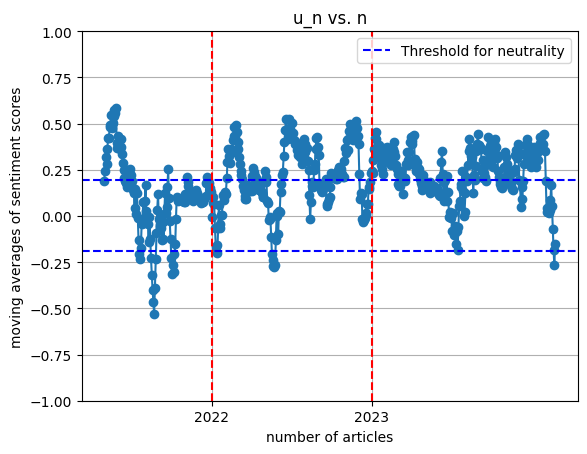

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

import os
from google.colab import files
import matplotlib.pyplot as plt
indices = list(range(n))

# Define the directory path and the file name based on variables
directory_path = "C:/Users/prana/Downloads/"  # Replace with your desired directory path
fname = f'{company}.png'  # Replace this with your variable

# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Define the full file path
file_path = os.path.join(directory_path, fname)

# Plot the u values
plt.plot(indices, u_values, marker='o', linestyle='-')
plt.title('u_n vs. n')
plt.xlabel('number of articles')
plt.ylabel('moving averages of sentiment scores')
plt.ylim(-1, 1)
plt.axhline(y=threshold, color='b', linestyle='--', label='Threshold for neutrality')
plt.axhline(y=-threshold, color='b', linestyle='--')
plt.axvline(x=y[0], color='r', linestyle='--')
plt.axvline(x=y[1], color='r', linestyle='--')
plt.xticks([y[0], y[1]], ['2022', '2023'])
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig(file_path)

# Display the plot (optional, comment out if not needed)
plt.show()

# Provide the file name for download
files.download(file_path)



In [ ]:
!pip install gradio
import gradio as gr
from PIL import Image

# Create a dictionary that maps stock symbols to image file paths
company_images = {
    "infosys": "C:/Users/prana/Downloads/infosys.png",
    "tata": "C:/Users/prana/Downloads/tata.png",
    "nestle": "C:/Users/prana/Downloads/nestle.png"
}

company_images[f'{company}'] = f'C:/Users/prana/Downloads/{company}.png'

# Function to generate a plot or display the corresponding company's image
def generate_stock_plot(stock):
    if stock in company_images:
        image_path = company_images[stock]
        image = Image.open(image_path)
    else:
        # Display a default image if the stock symbol is not found
        image_path = "default_image.png"
        image = Image.open(image_path)

    if threshold >= 0.2:
        paragraph = f"Exponential moving average = {threshold}. This stock has a positive sentiment and the current morale of the stock is high. Currently, the public has a positive opinion about the company in the market."
    else:
        paragraph = f"Exponential moving average = {threshold}. This stock's sentiment is neutral or negative. The recent decisions taken by the company have been reflected poorly by the public."

    return image, paragraph

# Create a Gradio interface

iface = gr.Interface(
    fn=generate_stock_plot,
    inputs="text",
    outputs=["image", "text"],
    title="Stock Information App",
    description="Enter a stock to get the corresponding company's performance.",
)


iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://763313a507e5a26b3c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
